## Problem set 4

## Name: Yawen Tan

## Link to your PS4 github repo: https://github.com/IsabellaTan/Brown-DATA1030-HW4.git

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Problem 1

We will work with the recidivism dataset in the problem set. The dataset contains information on criminal offenders screened in Florida from 2013 to 2014. The target variable (`two_year_recid`) for this dataset indicates whether or not an individual committed another crime after being released from prision. The csv file and a description are available in the `data` folder.

You can read more about the topic [here](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [here](https://arxiv.org/pdf/2106.05498.pdf). We will work with this dataset again in the context of algorithmic bias towards the end of the term.

You will read in the dataset, prepare the feature matrix and the target variable, perform EDA, and split the dataset into 60% training, 20% validation, and 20% test sets. Follow the steps outlined below.


### Problem 1a (5 points)

In [90]:
# your code here
# import the necessary packages. feel free to use pandas or polars, matplotlib, and sklearn
import pandas as pd
import polars as pl
from matplotlib import pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# read in the dataset
df = pd.read_csv('C:/Users/DELL/Desktop/zy/OneDrive/Brown/DATA1030/assignment4/Brown-DATA1030-HW4/data/recidivism_data.csv')
# drop the id and name columns because those are not useful for a machine learning algorithm
df.drop(columns=['id','name'], inplace=True)
# prepare the feature matrix X
X = df.loc[:, df.columns != 'two_year_recid']
# prepare the target variable y
y = df['two_year_recid']


### Problem 1b (5 points)

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree',
       'r_days_from_arrest', 'two_year_recid', 'c_jail_days', 'custody_days'],
      dtype='object')
The number of row is 7214
The number of columb is 13
sex: object
age: int64
age_cat: object
race: object
juv_fel_count: int64
juv_misd_count: int64
juv_other_count: int64
priors_count: int64
c_charge_degree: object
r_days_from_arrest: float64
two_year_recid: int64
c_jail_days: float64
custody_days: float64
two_year_recid
0    3963
1    3251
Name: count, dtype: int64


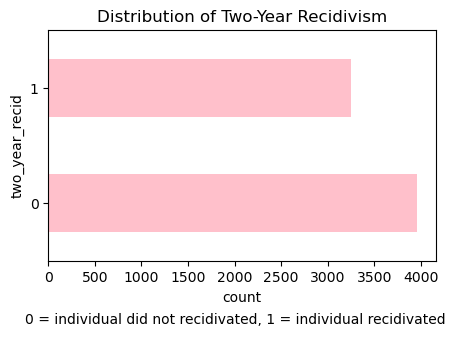

In [71]:
# your code here
# copy-paste the PS3 1a Q0-4 EDA questions here (modify as needed) and answer them.
# Q0 First, read the data into a data frame and display the columns of the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them.
print(df.columns)

# Q1 How many rows and columns do we have in the dataframe?
print("The number of row is " + str(df.shape[0]))
print("The number of columb is " + str(df.shape[1]))

# Q2 What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.
# Create a for loop to iterate through each column and print its name and data type
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")


# Q3 The ML target variable in this dataset is the sale price. We will develop ML pipelines to predict this variable based on the other features. Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.
print(df["two_year_recid"].value_counts())
# 'two_year_recid' is dummy(categorical) variable


# Q4 Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.
plt.figure(figsize=(5,3))
df['two_year_recid'].value_counts().plot.barh(color='pink')
plt.xlabel('count')
plt.ylabel('two_year_recid')
plt.title('Distribution of Two-Year Recidivism')
plt.figtext(0.5, -0.1, 
            "0 = individual did not recidivated, 1 = individual recidivated",
            ha="center", fontsize=10)
plt.show()







### Problem 1c (10 points)

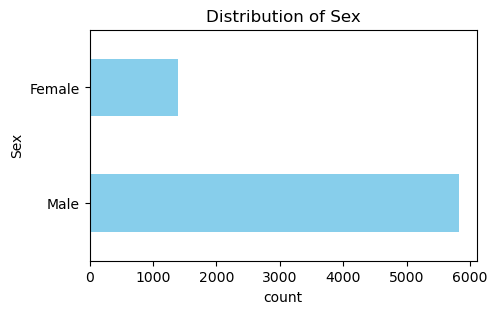

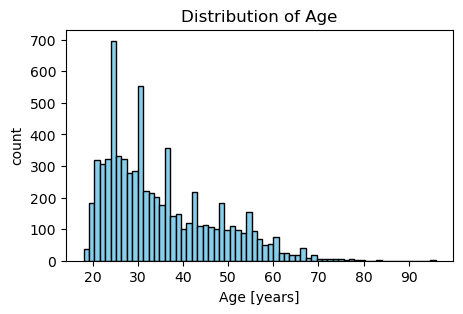

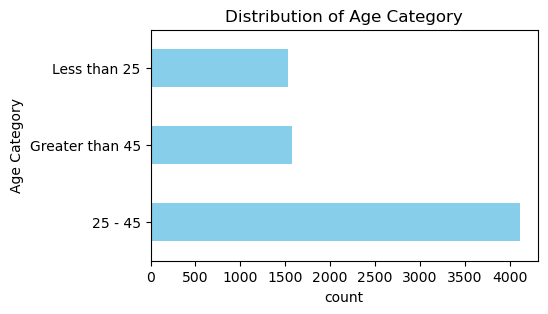

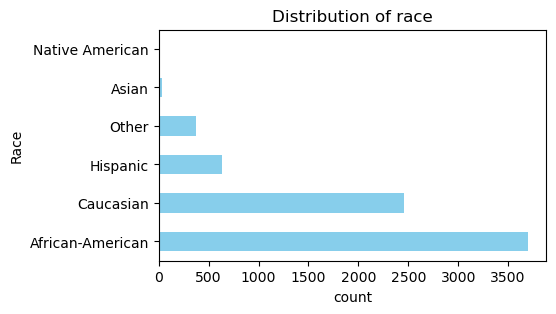

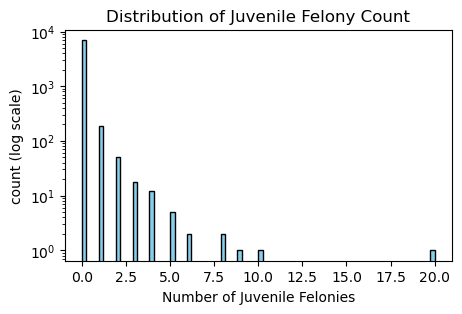

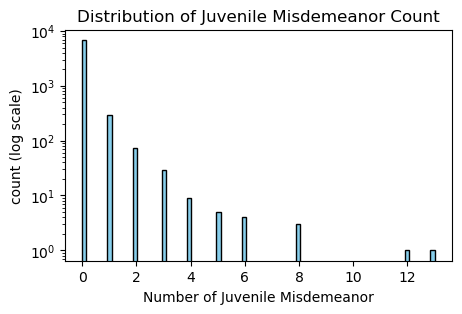

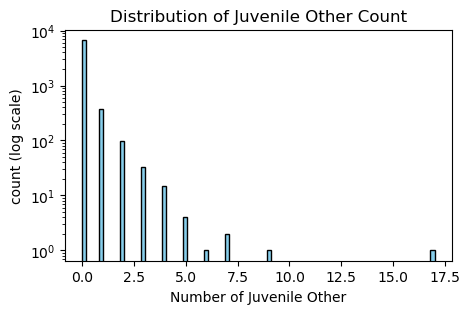

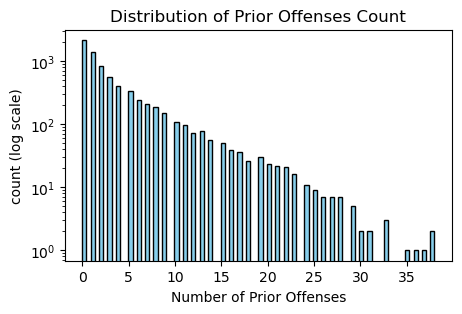

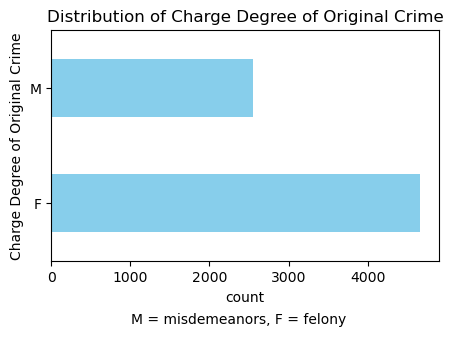

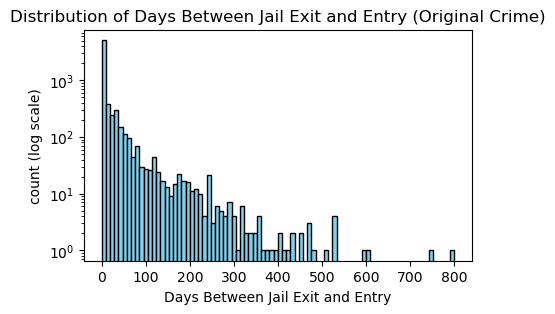

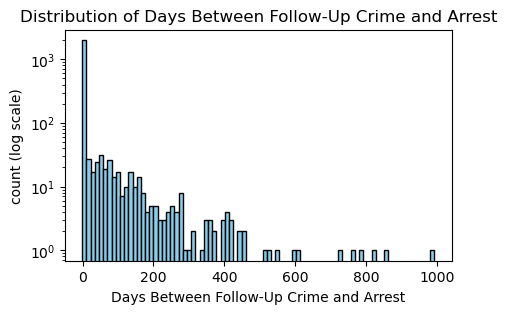

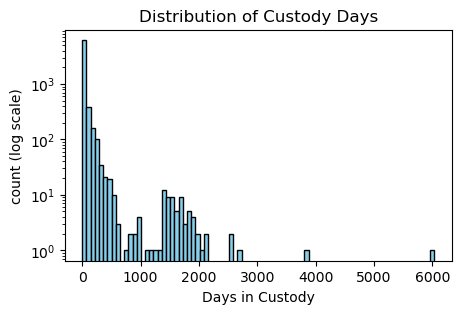

In [65]:
# your code here
# visualize each feature (12 figures total)
# make sure to add axis labels, add units if necessary, and add a figure title as well.

# Plot 1: Sex
plt.figure(figsize=(5,3))
df['sex'].value_counts().plot.barh(color='skyblue')
plt.xlabel('count')
plt.ylabel('Sex')
plt.title('Distribution of Sex')
plt.show()


# Plot 2: age
plt.figure(figsize=(5,3))
df['age'].plot.hist(
    bins = df['age'].nunique(), # Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Age [years]')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()


# Plot 3: age_cat
plt.figure(figsize=(5,3))
df['age_cat'].value_counts().plot.barh(color='skyblue')
plt.xlabel('count')
plt.ylabel('Age Category')
plt.title('Distribution of Age Category')
plt.show()


# Plot 4: race
plt.figure(figsize=(5,3))
df['race'].value_counts().plot.barh(color='skyblue')
plt.xlabel('count')
plt.ylabel('Race')
plt.title('Distribution of race')
plt.show()

# Plot 5: juv_fel_count 
plt.figure(figsize=(5,3))
df['juv_fel_count'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Number of Juvenile Felonies')
plt.ylabel('count (log scale)')
plt.title('Distribution of Juvenile Felony Count')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()

# Plot 6: juv_misd_count
plt.figure(figsize=(5,3))
df['juv_misd_count'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Number of Juvenile Misdemeanor')
plt.ylabel('count (log scale)')
plt.title('Distribution of Juvenile Misdemeanor Count')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()


# Plot 7: juv_other_count
plt.figure(figsize=(5,3))
df['juv_other_count'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Number of Juvenile Other')
plt.ylabel('count (log scale)')
plt.title('Distribution of Juvenile Other Count')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()


# Plot 8: priors_count
plt.figure(figsize=(5,3))
df['priors_count'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Number of Prior Offenses')
plt.ylabel('count (log scale)')
plt.title('Distribution of Prior Offenses Count')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()


# Plot 9: c_charge_degree
plt.figure(figsize=(5,3))
df['c_charge_degree'].value_counts().plot.barh(color='skyblue')
plt.xlabel('count')
plt.ylabel('Charge Degree of Original Crime')
plt.title('Distribution of Charge Degree of Original Crime')
plt.figtext(0.5, -0.1, 
            "M = misdemeanors, F = felony",
            ha="center", fontsize=10)
plt.show()


# Plot 10: c_jail_days
plt.figure(figsize=(5,3))
df['c_jail_days'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Days Between Jail Exit and Entry')
plt.ylabel('count (log scale)')
plt.title('Distribution of Days Between Jail Exit and Entry (Original Crime)')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()


# Plot 11: r_days_from_arrest
plt.figure(figsize=(5,3))
df['r_days_from_arrest'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Days Between Follow-Up Crime and Arrest')
plt.ylabel('count (log scale)')
plt.title('Distribution of Days Between Follow-Up Crime and Arrest')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()

# Plot 12:custody_days 
plt.figure(figsize=(5,3))
df['custody_days'].plot.hist( 
    bins=int(np.sqrt(df.shape[0])),# Let bins be the square root of the number of rows
    edgecolor='black', # Color of the edge of the bars
    color='skyblue',
    linewidth=1 # Width of the edge of the bars
    )
plt.xlabel('Days in Custody')
plt.ylabel('count (log scale)')
plt.title('Distribution of Custody Days')
plt.yscale('log') # Change the y-axis scale to log scale
plt.show()


# use sklearn to split the dataset into 60% training, 20% validation, and 20% test sets
random_state = 42
# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state) # 60% of points are in train and 40% of points are in other
# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = random_state) # 20% of points are in validation and 20% of points are in test


## Problem 2

You will preprocess the dataset in this problem. 

- First, you need to decide based on the dataset description, which features are continuous, ordinal, and categorical.
- Then you will write functions that perform fit-transform on the training set. The functions you create are tested with sklearn. The ability to implement algorithms is a strong indicator that you understand them and it is a crucial step in learning.
- Finally, you'll transform the validation and test sets using sklearn.

Follow the steps outined below.

### Problem 2a (10 points)

In [ ]:
# import the necesasry packages

# complete these lists. each feature name must appear exactly once in one of these lists
# continuous feature list
continuous_ftrs = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_jail_days', 'r_days_from_arrest', 'custody_days']
# categorical feature list
categorical_ftrs = ['sex', 'race', 'c_charge_degree']
# ordinal feature list
# for ordinal features, describe the ordered list of categories
ordinal_ftrs = ['age_cat']
# Each inner list in ordinal_cats corresponds to the ordered categories for the matching ordinal feature in ordinal_ftrs
ordinal_cats = [['Less than 25','25 - 45','Greater than 45']] # structure: [[]] -- list of list



def standard_scaler(df,continuous_ftrs):
    '''
    Standardize the specified continuous features in a dataframe

    Parameters:
    -----------
    
    df: a DataFrame that contains your feature matrix
    continuous_ftrs: a list of column names in df corresponding to continuous features to be standardized

    Returns:
    --------
        a pandas DataFrame called df_scaled where the specified continuous features have been standardized (mean=0, std=1), and all other columns  remain unchanged

    Example:
    --------

    >>> data = {'age': [20, 30, 40], 'income': [1000, 2000, 3000], 'gender': ['M', 'F', 'M']}
    >>> df = pd.DataFrame(data)
    >>> continuous_features = ['age', 'income']
    >>> df_scaled = standard_scaler(df, continuous_features)
    >>> df_scaled
           age    income gender
    0 -1.224745 -1.224745      M
    1  0.000000  0.000000      F
    2  1.224745  1.224745      M

    '''
    
    # test the input(s)
    # Test 1: if df is not a dataframe (pandas or polars), raise ValueError
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError("df is not a dataframe (pandas or polars)")
    # Test 2: if continuous_ftrs is not a list, raise ValueError
    if not isinstance(continuous_ftrs, list):
        raise ValueError("continuous_ftrs is not a list")
    # Test 3: if column name not in continuous_ftrs is in df, raise ValueError 
    for col in continuous_ftrs:
        if col not in df.columns:
            raise ValueError(f"Column {col} not found in dataframe")
    # Test 4:if continuous_ftrs is empty, raise ValueError
    if  continuous_ftrs==[]:
        raise ValueError("continuous_ftrs cannot be an empty list")
    # Test 5: if df has not row or column, raise ValueError
    if df.shape[0] == 0:
        raise ValueError("DataFrame is empty (0 rows)")
    if df.shape[1] == 0:
        raise ValueError("DataFrame has no columns")


    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    df_scaled = df.copy()
    for col in continuous_ftrs:
        col_data = df[col].astype(np.float64) # we set data type float 64, because sklearn standard scaler return float 64
        mean = col_data.mean() # Calculate mean value of specific column
        std = col_data.std(ddof=0) # Calculate standard deviation of specific column
        if std != 0:
            df_scaled[col] = (col_data - mean) / std
        else:# when std = 0, it means all value in this column are equal to the mean, so we let all the value in this column equal to 0.
            df_scaled[col] = 0
    return df_scaled


# test the standard scaler output. call the sklearn standard scaler.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
scaler = StandardScaler()
sklearn_scaled_array = scaler.fit_transform(df[continuous_ftrs])
# call the function
df_scaled = standard_scaler(df, continuous_ftrs)
# covert the dateframe to arrary in order to compare with sklearn output easier
scaled_array = df_scaled[continuous_ftrs].to_numpy()
# check if the sklearn output and function output are same
if not np.allclose(scaled_array, sklearn_scaled_array, equal_nan=True): # set equal_nan=True, because NA==NA return False
    raise ValueError("Scaled output does not match sklearn's StandardScaler")



### Problem 2b (10 points)

In [122]:
def onehot_encoder(df,categorical_ftrs):
    
    '''
    Perform one-hot encoding on the specified categorical features in a dataframe.

    Parameters:
    -----------
    df: a DataFrame that contains your feature matrix
    categorical_ftrs: a list of column names in df corresponding to categorical features to be one-hot encoded

    Returns:
    --------
    a pandas DataFrame called df_onehot where the specified categorical features have been replaced by one-hot encoded columns,
               with all other columns remaining unchanged. The new columns are named in the format 'feature_category'.

    Example:
    --------
    >>> data = {'age': [20, 30, 40], 'income': [1000, 2000, 3000], 'gender': ['M', 'F', 'M']}
    >>> df = pd.DataFrame(data)
    >>> categorical_features = ['gender']
    >>> df_onehot = onehot_encoder(df, categorical_features)
    >>> df_onehot
           age  income  gender_F  gender_M
    0      20    1000         0         1
    1      30    2000         1         0
    2      40    3000         0         1
    '''
    
    # test the input(s)
    # Test 1: if df is not a dataframe (pandas or polars), raise ValueError
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError("df is not a dataframe (pandas or polars)")
    # Test 2: if categorical_ftrs is not a list, raise ValueError
    if not isinstance(categorical_ftrs, list):
        raise ValueError("categorical_ftrs is not a list")
    # Test 3: if column name not in categorical_ftrs is in df, raise ValueError 
    for col in categorical_ftrs:
        if col not in df.columns:
            raise ValueError(f"Column {col} not found in dataframe")
    # Test 4:if categorical_ftrs is empty, raise ValueError
    if  categorical_ftrs==[]:
        raise ValueError("categorical_ftrs cannot be an empty list")
    # Test 5: if df has not row or column, raise ValueError
    if df.shape[0] == 0:
        raise ValueError("DataFrame is empty (0 rows)")
    if df.shape[1] == 0:
        raise ValueError("DataFrame has no columns")
    

    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    df_onehot = df.copy()
    for col in categorical_ftrs:
        for cat in df_onehot[col].unique(): # only go through the unique value in df_onehoe[col]
            df_onehot[f"{col}_{cat}"] = (df_onehot[col] == cat).astype(int) # create new column and convert the value to 1/0
        df_onehot.drop(columns=[col], inplace=True) # drop the previous column
    return df_onehot


# test the one-hot encoder output. call the sklearn OHE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.

df_cat = df[categorical_ftrs]
# initialize the encoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit the training data
sklearn_onehot_array = enc.fit_transform(df_cat)
# call the function
df_onehot = onehot_encoder(df, categorical_ftrs)
# Generate the list of one-hot column names in the format "feature_category" by iterating over each categorical feature and its categories as determined by the sklearn encoder
onehot_cols = []
for i in range(len(categorical_ftrs)):
    col = categorical_ftrs[i]
    cats = enc.categories_[i]
    for cat in cats:
        new_col = col + '_' + str(cat)
        onehot_cols.append(new_col)
# covert the dateframe to arrary in order to compare with sklearn output easier
onehot_array = df_onehot[onehot_cols].to_numpy()
if not np.array_equal(onehot_array, sklearn_onehot_array):
    raise ValueError("One-Hot output does not match sklearn's OneHotEncoder")

   

### Problem 2c (10 points)

In [123]:
def ordinal_encoder(df, ordinal_ftrs, ordinal_cats):
    '''
    Encode the specified ordinal features in a dataframe according to a predefined order of categories.

    Parameters:
    -----------
    df: a DataFrame that contains your feature matrix
    ordinal_ftrs: a list of column names in df corresponding to ordinal features to be encoded
    ordinal_cats: a list of lists, where each inner list contains the ordered categories for the corresponding ordinal feature

    Returns:
    --------
    a DataFrame called df_ordinal where the specified ordinal features have been replaced by integers reflecting their order
                (0 for the first category, 1 for the second, etc.), and all other columns remain unchanged

    Example:
    --------
    >>> data = {'age_cat': ['Less than 25', '25-45', 'Greater than 45'], 'income': [1000, 2000, 3000]}
    >>> df = pd.DataFrame(data)
    >>> ordinal_features = ['age_cat']
    >>> ordinal_cats = [['Less than 25', '25-45', 'Greater than 45']]
    >>> df_1 = ordinal_encoder(df, ordinal_features, ordinal_cats)
    >>> df_1
       age_cat  income
    0        0    1000
    1        1    2000
    2        2    3000
    '''
    
    # test the input(s)
    # Test 1: if df is not a dataframe (pandas or polars), raise ValueError
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError("df is not a dataframe (pandas or polars)")
    # Test 2: if ordinal_ftrs is not a list, raise ValueError
    if not isinstance(ordinal_ftrs, list):
        raise ValueError("ordinal_ftrs is not a list")
    # Test 3: if column name not in ordinal_ftrs is in df, raise ValueError 
    for col in ordinal_ftrs:
        if col not in df.columns:
            raise ValueError(f"Column {col} not found in dataframe")
    # Test 4:if ordinal_ftrs is empty, raise ValueError
    if  ordinal_ftrs==[]:
        raise ValueError("ordinal_ftrs cannot be an empty list")
    # Test 5: if df has not row or column, raise ValueError
    if df.shape[0] == 0:
        raise ValueError("DataFrame is empty (0 rows)")
    if df.shape[1] == 0:
        raise ValueError("DataFrame has no columns")
    # Test 6: if ordinal_cats is empty, raise ValueError
    if ordinal_cats==[]:
        raise ValueError("ordinal_cats cannot be an empty list")
    # Test 7: if every category in ordinal_cats doesn't exist in the corresponding column of df, raise ValueError
    for i, col in enumerate(ordinal_ftrs):
        unique_values = df[col].unique()
        for cat in ordinal_cats[i]:
            if cat not in unique_values:
                raise ValueError(f"Category '{cat}' in ordinal_cats[{i}] is not found in column '{col}'")
    # Test 8: Check lengths match
    if len(ordinal_ftrs) != len(ordinal_cats):
        raise ValueError("Length of ordinal_ftrs and ordinal_cats must match")



    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    
    df_ordinal = df.copy()
    # Loop over each feature and its categories
    for col_index, col in enumerate(ordinal_ftrs):
        # Get the ordered categories for this feature
        categories = ordinal_cats[col_index]
        # Find the integer column location of this feature in the dataframe
        col_loc = df_ordinal.columns.get_loc(col)
        for row_index in range(len(df_ordinal)):
            for i, cat in enumerate(categories):
                # Check if the value in this cell matches the current category
                if df_ordinal.iloc[row_index, col_loc] == cat: 
                    # # Replace the category with its ordinal index (converted to float because the output of sklearn ordinal enconder is float64)
                    df_ordinal.iloc[row_index, col_loc] = float(i)

    return df_ordinal

# test the ordinal encoder output. call the sklearn OE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.

df_ord = df[ordinal_ftrs]
enc = OrdinalEncoder(categories = ordinal_cats) # The ordered list of categories need to be provided. By default, the categories are alphabetically ordered!
# fit the training data
sklearn_ordinal_array = enc.fit_transform(df_ord)
# call the function
df_ordinal = ordinal_encoder(df, ordinal_ftrs, ordinal_cats)
# covert the dateframe to arrary in order to compare with sklearn output easier
ordinal_array = df_ordinal[ordinal_ftrs].to_numpy()
# check if the sklearn output and function output are same
if not np.allclose(ordinal_array, sklearn_ordinal_array):
    raise ValueError("Ordinal output does not match sklearn's OrdinalEncoder")


# now, please combine your three functions to create a df that is fully transformed
# test this
# This part is duplicated in 2d, I will show this part in 2d


### Problem 2d (5 points)

In [126]:
# test 1: use the sklearn transformers you prepared to test your functions and transform the train/validation/test sets.
# make sure that the transformed train you prepared is identical to the sklearn transformed training set
# The fuctions you write in 2a-c only need to perform an operation equivalent to sklearn's fit_transform(). You don't need to take care of the transform only mode of sklearn. 
# if the sets are not identical, carefully read the manuals of all functions and methods that you use.
# -------- Use above function to transform the train/validation/test sets------------
# Apply the three transformations on the training set
X_train_scaled = standard_scaler(X_train, continuous_ftrs)
X_train_ordinal = ordinal_encoder(X_train_scaled, ordinal_ftrs, ordinal_cats)
X_train_full = onehot_encoder(X_train_ordinal, categorical_ftrs)
# Apply the same transformations on validation sets
X_val_scaled = standard_scaler(X_val, continuous_ftrs)
X_val_ordinal = ordinal_encoder(X_val_scaled, ordinal_ftrs, ordinal_cats)
X_val_full = onehot_encoder(X_val_ordinal, categorical_ftrs)
# Apply the same transformations on  test sets
X_test_scaled = standard_scaler(X_test, continuous_ftrs)
X_test_ordinal = ordinal_encoder(X_test_scaled, ordinal_ftrs, ordinal_cats)
X_test_full = onehot_encoder(X_test_ordinal, categorical_ftrs)
# -------- Use sklearn to transform the train/validation/test sets------------
sca = StandardScaler()
X_train_cont = sca.fit_transform(X_train[continuous_ftrs])
ord = OrdinalEncoder(categories=ordinal_cats)
X_train_ord = ord.fit_transform(X_train[ordinal_ftrs])
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train[categorical_ftrs])
df_cont = pd.DataFrame(X_train_cont, columns=continuous_ftrs, index=X_train.index)
df_ord = pd.DataFrame(X_train_ord, columns=ordinal_ftrs, index=X_train.index)
df_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(categorical_ftrs), index=X_train.index)
X_train_skl = pd.concat([df_cont, df_ord, df_cat], axis=1)

if np.allclose(X_train_full.to_numpy(), X_train_skl.to_numpy()):
    print("Test passed: outputs match!")
else:
    raise ValueError("Test failed: outputs do not match!")


# test 2: print out the headers of the fully transformed train, validation, and test sets

# test 3: make sure that the order of the features is exactly the same in each set




ValueError: Test failed: outputs do not match!